In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

# 縣市＋區域編碼

In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/data/training_data.csv')
df = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/data/public/public_dataset.csv')
df

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,備註,主建物面積,陽台面積,附屬建物面積
0,PU-1,新北市,樹林區,大有路,2.039378,None,3,7,住家用,鋼筋混凝土造,...,13.916667,0.472202,0.146176,1.0,288745,2760266,NaN,0.849664,0.146161,-0.438452
1,PU-2,新北市,三重區,力行路一段,-0.077786,None,5,5,住家用,鋼筋混凝土造,...,40.833333,-0.546455,-0.819326,0.0,298751,2773492,NaN,-0.004102,0.064257,-0.438452
2,PU-3,新北市,板橋區,民生路三段,-0.555766,None,2,20,集合住宅,鋼筋混凝土造,...,1.333333,0.124032,-0.167419,1.0,297000,2769106,NaN,-0.285862,-0.775260,1.323042
3,PU-4,新北市,泰山區,明志路二段,-0.744838,None,6,16,住家用,鋼筋混凝土造,...,27.500000,-0.027072,0.115280,1.0,293076,2771160,NaN,0.027582,0.316794,-0.139532
4,PU-5,台北市,信義區,忠孝東路五段,-0.610923,None,3,7,住家用,鋼筋混凝土造,...,40.500000,-0.863600,-0.819326,0.0,308103,2770220,NaN,-0.883328,-0.560262,-0.075477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,PU-5872,台南市,中西區,中華西路二段,0.560113,None,5,5,集合住宅,鋼筋混凝土造,...,0.833333,-0.788335,-0.016028,1.0,166751,2545157,NaN,-0.867769,-1.078987,-0.438452
5872,PU-5873,台中市,北區,育樂街,-1.020142,None,5,22,集合住宅,鋼筋混凝土造,...,3.416667,-0.910137,0.799628,1.0,218814,2672567,NaN,-1.107095,-0.754784,-0.438452
5873,PU-5874,新北市,新店區,安康路二段,-0.662691,None,10,12,住家用,鋼筋混凝土造,...,12.583333,-0.459699,0.004054,1.0,301609,2761359,NaN,-0.474267,-0.131972,-0.438452
5874,PU-5875,台北市,信義區,忠孝東路五段,0.513752,None,2,5,住家用,鋼筋混凝土造,...,36.250000,0.357294,-0.819326,0.0,308833,2770624,NaN,0.926327,1.243333,-0.316749


In [ ]:
import math

In [ ]:
#二度分帶轉經緯度
def twd97_to_lonlat(x, y):
    """
    list
        [longitude, latitude] = [經度, 緯度]
    """

    a = 6378137
    b = 6356752.314245
    long_0 = 121 * math.pi / 180.0
    k0 = 0.9999
    dx = 250000
    dy = 0

    e = math.pow((1-math.pow(b, 2)/math.pow(a,2)), 0.5)

    x -= dx
    y -= dy

    M = y / k0

    mu = M / ( a*(1-math.pow(e, 2)/4 - 3*math.pow(e,4)/64 - 5 * math.pow(e, 6)/256))
    e1 = (1.0 - pow((1   - pow(e, 2)), 0.5)) / (1.0 +math.pow((1.0 -math.pow(e,2)), 0.5))

    j1 = 3*e1/2-27*math.pow(e1,3)/32
    j2 = 21 * math.pow(e1,2)/16 - 55 * math.pow(e1, 4)/32
    j3 = 151 * math.pow(e1, 3)/96
    j4 = 1097 * math.pow(e1, 4)/512

    fp = mu + j1 * math.sin(2*mu) + j2 * math.sin(4* mu) + j3 * math.sin(6*mu) + j4 * math.sin(8* mu)

    e2 = math.pow((e*a/b),2)
    c1 = math.pow(e2*math.cos(fp),2)
    t1 = math.pow(math.tan(fp),2)
    r1 = a * (1-math.pow(e,2)) / math.pow( (1-math.pow(e,2)* math.pow(math.sin(fp),2)), (3/2))
    n1 = a / math.pow((1-math.pow(e,2)*math.pow(math.sin(fp),2)),0.5)
    d = x / (n1*k0)

    q1 = n1* math.tan(fp) / r1
    q2 = math.pow(d,2)/2
    q3 = ( 5 + 3 * t1 + 10 * c1 - 4 * math.pow(c1,2) - 9 * e2 ) * math.pow(d,4)/24
    q4 = (61 + 90 * t1 + 298 * c1 + 45 * math.pow(t1,2) - 3 * math.pow(c1,2) - 252 * e2) * math.pow(d,6)/720
    lat = fp - q1 * (q2 - q3 + q4)


    q5 = d
    q6 = (1+2*t1+c1) * math.pow(d,3) / 6
    q7 = (5 - 2 * c1 + 28 * t1 - 3 * math.pow(c1,2) + 8 * e2 + 24 * math.pow(t1,2)) * math.pow(d,5) / 120
    lon = long_0 + (q5 - q6 + q7) / math.cos(fp)

    lat = (lat*180) / math.pi
    lon = (lon*180) / math.pi
    return lon, lat

In [ ]:
df.loc[:, '橫坐標'] = df['橫坐標'].astype('float64')
df.loc[:, '縱坐標'] = df['縱坐標'].astype('float64')
print(type(df['橫坐標'][100]))
print(type(df['縱坐標'][100]))

<class 'numpy.float64'>
<class 'numpy.float64'>


<ipython-input-6-1604db67fd0a>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, '橫坐標'] = df['橫坐標'].astype('float64')
<ipython-input-6-1604db67fd0a>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, '縱坐標'] = df['縱坐標'].astype('float64')


In [ ]:
#二度分帶轉經緯度
lo = pd.Series([np.nan]*len(df), index=df.index)
la = pd.Series([np.nan]*len(df), index=df.index)
for i in range(0, len(df)):
  lon, lat = twd97_to_lonlat(df['橫坐標'][i], df['縱坐標'][i] )
  lo[i]=lon
  la[i]=lat
df = df.assign(經度=lo, 緯度=la)
df = df.drop(['橫坐標','縱坐標'], axis=1)
df

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,屋齡,建物面積,車位面積,車位個數,備註,主建物面積,陽台面積,附屬建物面積,經度,緯度
0,PU-1,新北市,樹林區,大有路,2.039378,None,3,7,住家用,鋼筋混凝土造,...,13.916667,0.472202,0.146176,1.0,NaN,0.849664,0.146161,-0.438452,121.383684,24.949745
1,PU-2,新北市,三重區,力行路一段,-0.077786,None,5,5,住家用,鋼筋混凝土造,...,40.833333,-0.546455,-0.819326,0.0,NaN,-0.004102,0.064257,-0.438452,121.483236,25.068862
2,PU-3,新北市,板橋區,民生路三段,-0.555766,None,2,20,集合住宅,鋼筋混凝土造,...,1.333333,0.124032,-0.167419,1.0,NaN,-0.285862,-0.775260,1.323042,121.465730,25.029321
3,PU-4,新北市,泰山區,明志路二段,-0.744838,None,6,16,住家用,鋼筋混凝土造,...,27.500000,-0.027072,0.115280,1.0,NaN,0.027582,0.316794,-0.139532,121.426912,25.047981
4,PU-5,台北市,信義區,忠孝東路五段,-0.610923,None,3,7,住家用,鋼筋混凝土造,...,40.500000,-0.863600,-0.819326,0.0,NaN,-0.883328,-0.560262,-0.075477,121.575795,25.038992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,PU-5872,台南市,中西區,中華西路二段,0.560113,None,5,5,集合住宅,鋼筋混凝土造,...,0.833333,-0.788335,-0.016028,1.0,NaN,-0.867769,-1.078987,-0.438452,120.187896,23.005809
5872,PU-5873,台中市,北區,育樂街,-1.020142,None,5,22,集合住宅,鋼筋混凝土造,...,3.416667,-0.910137,0.799628,1.0,NaN,-1.107095,-0.754784,-0.438452,120.693103,24.158104
5873,PU-5874,新北市,新店區,安康路二段,-0.662691,None,10,12,住家用,鋼筋混凝土造,...,12.583333,-0.459699,0.004054,1.0,NaN,-0.474267,-0.131972,-0.438452,121.511111,24.959230
5874,PU-5875,台北市,信義區,忠孝東路五段,0.513752,None,2,5,住家用,鋼筋混凝土造,...,36.250000,0.357294,-0.819326,0.0,NaN,0.926327,1.243333,-0.316749,121.583046,25.042611


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
city = []
for i in range(len(df)):
  city_long = df['縣市'][i] + df['鄉鎮市區'][i]
  city.append(city_long)


label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(city)


df['縣市_區域'] = encoded_data
df

,ID,縣市,鄉鎮市區,路名,土地面積,使用分區,移轉層次,總樓層數,主要用途,主要建材,...,建物面積,車位面積,車位個數,備註,主建物面積,陽台面積,附屬建物面積,經度,緯度,縣市_區域
0,PU-1,新北市,樹林區,大有路,2.039378,None,3,7,住家用,鋼筋混凝土造,...,0.472202,0.146176,1.0,NaN,0.849664,0.146161,-0.438452,121.383684,24.949745,69
1,PU-2,新北市,三重區,力行路一段,-0.077786,None,5,5,住家用,鋼筋混凝土造,...,-0.546455,-0.819326,0.0,NaN,-0.004102,0.064257,-0.438452,121.483236,25.068862,60
2,PU-3,新北市,板橋區,民生路三段,-0.555766,None,2,20,集合住宅,鋼筋混凝土造,...,0.124032,-0.167419,1.0,NaN,-0.285862,-0.775260,1.323042,121.465730,25.029321,67
3,PU-4,新北市,泰山區,明志路二段,-0.744838,None,6,16,住家用,鋼筋混凝土造,...,-0.027072,0.115280,1.0,NaN,0.027582,0.316794,-0.139532,121.426912,25.047981,72
4,PU-5,台北市,信義區,忠孝東路五段,-0.610923,None,3,7,住家用,鋼筋混凝土造,...,-0.863600,-0.819326,0.0,NaN,-0.883328,-0.560262,-0.075477,121.575795,25.038992,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,PU-5872,台南市,中西區,中華西路二段,0.560113,None,5,5,集合住宅,鋼筋混凝土造,...,-0.788335,-0.016028,1.0,NaN,-0.867769,-1.078987,-0.438452,120.187896,23.005809,30
5872,PU-5873,台中市,北區,育樂街,-1.020142,None,5,22,集合住宅,鋼筋混凝土造,...,-0.910137,0.799628,1.0,NaN,-1.107095,-0.754784,-0.438452,120.693103,24.158104,1
5873,PU-5874,新北市,新店區,安康路二段,-0.662691,None,10,12,住家用,鋼筋混凝土造,...,-0.459699,0.004054,1.0,NaN,-0.474267,-0.131972,-0.438452,121.511111,24.959230,65
5874,PU-5875,台北市,信義區,忠孝東路五段,0.513752,None,2,5,住家用,鋼筋混凝土造,...,0.357294,-0.819326,0.0,NaN,0.926327,1.243333,-0.316749,121.583046,25.042611,20


In [ ]:
print(df['縣市_區域'].unique())
print(len(df['縣市_區域'].unique()))

[ 69  60  67  72  20  92  66  77  28 113   2 110  27  79  64  71  24  82
  90  21  68  26  78  61 107  22  18  70  84 122  47  73  55  76 118  33
 116   0  65  44 108   4  19  53  12  80  40 101   6  14  39 114  25  41
  85   3  58  15  88  98  62  23  11 120 115  13  29  37  83   5  48   8
  63  81   1  34  31 112  51  52  45  86  95  36 119 102   9  91  74  42
 109  49  30  46 121 117  75  16 111  94  97 103  93  43  57  96  17  99
  87  38  56  35 104   7  89 106  54  59  10 105  32 100  50]
123


In [ ]:
a = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/預處理publictest/publictest_all.csv')
a['縣市_區域'] = df['縣市_區域']
a

,ID,index,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,...,與醫療機構最短距,與便利超商最短距,<0.5的超商數量,<0.5公車站數,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,縱坐標,橫坐標
0,PU-1,16,1,2.039378,3,7,2,4,2,13.916667,...,0.12,0.14,6.0,139.0,10.72,69,11.12,10.78,2760266,288745
1,PU-2,27,1,-0.077786,5,5,2,4,1,40.833333,...,0.13,0.14,23.0,54.0,6.58,60,6.22,4.11,2773492,298751
2,PU-3,46,1,-0.555766,2,20,10,4,0,1.333333,...,0.22,0.23,23.0,28.0,1.92,67,1.62,1.71,2769106,297000
3,PU-4,53,1,-0.744838,6,16,2,4,0,27.500000,...,0.13,0.01,7.0,94.0,5.53,72,5.51,5.29,2771160,293076
4,PU-5,11,0,-0.610923,3,7,2,4,2,40.500000,...,0.05,0.07,24.0,152.0,1.15,20,0.89,3.52,2770220,308103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,PU-5872,1822,7,0.560113,5,5,10,4,1,0.833333,...,0.14,0.18,7.0,12.0,1.68,30,2.34,13.47,2545157,166751
5872,PU-5873,3181,4,-1.020142,5,22,10,4,0,3.416667,...,0.14,0.10,14.0,82.0,4.71,1,3.19,9.32,2672567,218814
5873,PU-5874,5874,1,-0.662691,10,12,2,4,0,12.583333,...,0.09,0.07,13.0,129.0,7.50,65,7.58,7.74,2761359,301609
5874,PU-5875,4896,0,0.513752,2,5,2,4,1,36.250000,...,0.06,0.04,22.0,64.0,1.95,20,1.71,2.69,2770624,308833


In [ ]:
a.to_csv('/content/drive/MyDrive/AI GO/深度學習/預處理publictest/publictest_all.csv')

# 人口密度

In [3]:
data = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/預處理private/00.csv')
data

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,車位個數,主建物面積,陽台面積,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,0.0,0.127159,0.035249,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,1.0,-0.464083,-0.160979,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,0.0,0.832407,2.461656,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,0.0,0.052476,-1.642077,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,0.0,-0.968196,-0.333319,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,2.0,-0.496050,0.946431,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,3.0,2.717029,1.105120,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,0.0,0.242296,-0.084194,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,0.0,-0.257007,2.461656,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0


In [4]:
people = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/data/人口密度.csv', encoding='utf-8')
people

,區域別,人口密度
0,新北市,"1,946.61"
1,臺北市,"9,126.87"
2,桃園市,"1,868.59"
3,臺中市,"1,270.70"
4,臺南市,845.48
5,高雄市,924.21
6,宜蘭縣,209.49
7,新竹縣,406.65
8,苗栗縣,293.98
9,彰化縣,"1,159.01"


In [5]:
people_old = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/data/老化指數.csv', encoding='utf-8')
people_old

,區域別,老化指數
0,新北市,147.86
1,臺北市,166.10
2,桃園市,101.89
3,臺中市,111.76
4,臺南市,156.53
5,高雄市,161.78
6,宜蘭縣,163.33
7,新竹縣,86.71
8,苗栗縣,157.36
9,彰化縣,147.93


In [6]:
people['老化指數'] = people_old['老化指數']
people

,區域別,人口密度,老化指數
0,新北市,"1,946.61",147.86
1,臺北市,"9,126.87",166.10
2,桃園市,"1,868.59",101.89
3,臺中市,"1,270.70",111.76
4,臺南市,845.48,156.53
5,高雄市,924.21,161.78
6,宜蘭縣,209.49,163.33
7,新竹縣,406.65,86.71
8,苗栗縣,293.98,157.36
9,彰化縣,"1,159.01",147.93


In [7]:
people = people.drop(index = [10, 14, 16, 21, 22], axis = 1)
people

,區域別,人口密度,老化指數
0,新北市,"1,946.61",147.86
1,臺北市,"9,126.87",166.10
2,桃園市,"1,868.59",101.89
3,臺中市,"1,270.70",111.76
4,臺南市,845.48,156.53
5,高雄市,924.21,161.78
6,宜蘭縣,209.49,163.33
7,新竹縣,406.65,86.71
8,苗栗縣,293.98,157.36
9,彰化縣,"1,159.01",147.93


In [8]:
people = people.reset_index()
people = people.drop('index', axis = 1)
people

,區域別,人口密度,老化指數
0,新北市,"1,946.61",147.86
1,臺北市,"9,126.87",166.10
2,桃園市,"1,868.59",101.89
3,臺中市,"1,270.70",111.76
4,臺南市,845.48,156.53
5,高雄市,924.21,161.78
6,宜蘭縣,209.49,163.33
7,新竹縣,406.65,86.71
8,苗栗縣,293.98,157.36
9,彰化縣,"1,159.01",147.93


In [9]:
# 訓練集沒有：南投縣、台東縣
store_city_name = ['金門縣', '基隆市', '臺北市', '新北市', '桃園市', '新竹縣', '新竹市', '苗栗縣', '臺中市', '彰化縣', '雲林縣', '嘉義縣', '嘉義市', '臺南市', '高雄市', '屏東縣', '花蓮縣', '宜蘭縣']
traindata_city_name = [17, 12, 0, 1, 5, 3, 2, 16, 4, 8, 11, 15, 10, 7, 6, 14, 13, 9]
'''
    '台北市':0,
    '新北市':1,
    '新竹市':2,
    '新竹縣':3,
    '台中市':4,
    '桃園市':5,
    '高雄市':6,
    '台南市':7,
    '彰化縣':8,
    '宜蘭縣':9,
    '嘉義市':10,
    '雲林縣':11,
    '基隆市':12,
    '花蓮縣':13,
    '屏東縣':14,
    '嘉義縣':15,
    '苗栗縣':16,
    '金門縣':17
'''

"\n    '台北市':0,\n    '新北市':1,\n    '新竹市':2,\n    '新竹縣':3,\n    '台中市':4,\n    '桃園市':5,\n    '高雄市':6,\n    '台南市':7,\n    '彰化縣':8,\n    '宜蘭縣':9,\n    '嘉義市':10,\n    '雲林縣':11,\n    '基隆市':12,\n    '花蓮縣':13,\n    '屏東縣':14,\n    '嘉義縣':15,\n    '苗栗縣':16,\n    '金門縣':17\n"

In [10]:
traindata_city_name[0]

17

In [11]:
temp = []
for i in range(len(people)):
  for j in range(len(store_city_name)):
    if people['區域別'][i] == store_city_name[j]:
      t = traindata_city_name[j]
      temp.append(t)

print(temp)

[1, 0, 5, 4, 7, 6, 9, 3, 16, 8, 11, 15, 14, 13, 12, 2, 10, 17]


In [12]:
people['縣市代號'] = temp
people

,區域別,人口密度,老化指數,縣市代號
0,新北市,"1,946.61",147.86,1
1,臺北市,"9,126.87",166.10,0
2,桃園市,"1,868.59",101.89,5
3,臺中市,"1,270.70",111.76,4
4,臺南市,845.48,156.53,7
5,高雄市,924.21,161.78,6
6,宜蘭縣,209.49,163.33,9
7,新竹縣,406.65,86.71,3
8,苗栗縣,293.98,157.36,16
9,彰化縣,"1,159.01",147.93,8


In [14]:
df = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/預處理private/00.csv')
df

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,車位個數,主建物面積,陽台面積,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,0.0,0.127159,0.035249,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,1.0,-0.464083,-0.160979,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,0.0,0.832407,2.461656,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,0.0,0.052476,-1.642077,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,0.0,-0.968196,-0.333319,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,2.0,-0.496050,0.946431,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,3.0,2.717029,1.105120,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,0.0,0.242296,-0.084194,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,0.0,-0.257007,2.461656,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0


In [15]:
a = [] # 人口密度
b = [] # 老化指數
for i in range(len(df)):
  for j in range(len(people)):
    if df['縣市'][i] == people['縣市代號'][j]:
      aa = people['人口密度'][j]
      bb = people['老化指數'][j]
      a.append(aa)
      b.append(bb)

In [16]:
len(b)

5875

In [17]:
df['人口密度'] = a
df['老化指數'] = b
df

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,陽台面積,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量,人口密度,老化指數
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,0.035249,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0,924.21,161.78
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,-0.160979,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0,"9,126.87",166.10
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,2.461656,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0,"9,126.87",166.10
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,-1.642077,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0,"1,946.61",147.86
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,-0.333319,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0,"1,946.61",147.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,0.946431,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0,924.21,161.78
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,1.105120,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0,"9,126.87",166.10
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,-0.084194,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0,"1,946.61",147.86
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,2.461656,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0,924.21,161.78


In [19]:
df.to_csv('/content/drive/MyDrive/AI GO/深度學習/預處理private/00.csv')

In [21]:
data = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/預處理private/00.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,陽台面積,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量,人口密度,老化指數
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,0.035249,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0,924.21,161.78
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,-0.160979,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0,"9,126.87",166.10
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,2.461656,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0,"9,126.87",166.10
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,-1.642077,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0,"1,946.61",147.86
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,-0.333319,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0,"1,946.61",147.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,0.946431,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0,924.21,161.78
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,1.105120,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0,"9,126.87",166.10
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,-0.084194,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0,"1,946.61",147.86
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,2.461656,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0,924.21,161.78


In [22]:
def remove_comma(x):
  return x.replace(',', '')
data['人口密度'] = data['人口密度'].apply(remove_comma).astype(float)
data

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,陽台面積,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量,人口密度,老化指數
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,0.035249,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0,924.21,161.78
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,-0.160979,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0,9126.87,166.10
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,2.461656,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0,9126.87,166.10
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,-1.642077,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0,1946.61,147.86
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,-0.333319,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0,1946.61,147.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,0.946431,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0,924.21,161.78
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,1.105120,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0,9126.87,166.10
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,-0.084194,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0,1946.61,147.86
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,2.461656,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0,924.21,161.78


In [23]:
data.to_csv('/content/drive/MyDrive/AI GO/深度學習/預處理private/00.csv')

#收入

In [26]:
#df = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/traindataset加金門後/00traindata_all.csv ', index_col = 'ID')
#df = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/預處理publictest/00publictest_all.csv ', index_col = 'ID')
df = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/預處理private/00.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,陽台面積,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量,人口密度,老化指數
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,0.035249,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0,924.21,161.78
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,-0.160979,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0,9126.87,166.10
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,2.461656,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0,9126.87,166.10
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,-1.642077,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0,1946.61,147.86
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,-0.333319,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0,1946.61,147.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,0.946431,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0,924.21,161.78
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,1.105120,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0,9126.87,166.10
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,-0.084194,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0,1946.61,147.86
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,2.461656,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0,924.21,161.78


In [27]:
income = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/data/收入.csv')
income

,縣市,平均收入
0,新北市,0.005074
1,臺北市,0.006300
2,桃園市,0.005368
3,臺中市,0.005039
4,臺南市,0.004564
5,高雄市,0.004997
6,宜蘭縣,0.004322
7,新竹縣,0.006555
8,苗栗縣,0.005121
9,彰化縣,0.004227


In [28]:
income = income.drop(index = [10, 14], axis = 1)
income

,縣市,平均收入
0,新北市,0.005074
1,臺北市,0.006300
2,桃園市,0.005368
3,臺中市,0.005039
4,臺南市,0.004564
5,高雄市,0.004997
6,宜蘭縣,0.004322
7,新竹縣,0.006555
8,苗栗縣,0.005121
9,彰化縣,0.004227


In [30]:
income = income.reset_index()
income = income.drop('index', axis = 1)
#income = income.drop('level_0', axis = 1)
income

,縣市,平均收入
0,新北市,0.005074
1,臺北市,0.006300
2,桃園市,0.005368
3,臺中市,0.005039
4,臺南市,0.004564
5,高雄市,0.004997
6,宜蘭縣,0.004322
7,新竹縣,0.006555
8,苗栗縣,0.005121
9,彰化縣,0.004227


In [31]:
# 訓練集沒有：南投縣、台東縣
store_city_name = ['澎湖縣', '基隆市', '臺北市', '新北市', '桃園市', '新竹縣', '新竹市', '苗栗縣', '臺中市', '彰化縣', '雲林縣', '嘉義縣', '嘉義市', '臺南市', '高雄市', '屏東縣', '花蓮縣', '宜蘭縣']
traindata_city_name = [17, 12, 0, 1, 5, 3, 2, 16, 4, 8, 11, 15, 10, 7, 6, 14, 13, 9]
'''
    '台北市':0,
    '新北市':1,
    '新竹市':2,
    '新竹縣':3,
    '台中市':4,
    '桃園市':5,
    '高雄市':6,
    '台南市':7,
    '彰化縣':8,
    '宜蘭縣':9,
    '嘉義市':10,
    '雲林縣':11,
    '基隆市':12,
    '花蓮縣':13,
    '屏東縣':14,
    '嘉義縣':15,
    '苗栗縣':16,
    '金門縣':17
'''

"\n    '台北市':0,\n    '新北市':1,\n    '新竹市':2,\n    '新竹縣':3,\n    '台中市':4,\n    '桃園市':5,\n    '高雄市':6,\n    '台南市':7,\n    '彰化縣':8,\n    '宜蘭縣':9,\n    '嘉義市':10,\n    '雲林縣':11,\n    '基隆市':12,\n    '花蓮縣':13,\n    '屏東縣':14,\n    '嘉義縣':15,\n    '苗栗縣':16,\n    '金門縣':17\n"

In [32]:
temp = []
for i in range(len(income)):
  for j in range(len(store_city_name)):
    if income['縣市'][i] == store_city_name[j]:
      t = traindata_city_name[j]
      temp.append(t)

print(temp)

income['縣市代號'] = temp
income

[1, 0, 5, 4, 7, 6, 9, 3, 16, 8, 11, 15, 14, 13, 17, 12, 2, 10]


,縣市,平均收入,縣市代號
0,新北市,0.005074,1
1,臺北市,0.006300,0
2,桃園市,0.005368,5
3,臺中市,0.005039,4
4,臺南市,0.004564,7
5,高雄市,0.004997,6
6,宜蘭縣,0.004322,9
7,新竹縣,0.006555,3
8,苗栗縣,0.005121,16
9,彰化縣,0.004227,8


In [33]:
c = [] # 平均收入
for i in range(len(df)):
  for j in range(len(income)):
    if df['縣市'][i] == income['縣市代號'][j]:
      cc = income['平均收入'][j]
      c.append(cc)

In [34]:
df['平均收入'] = c
df

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量,人口密度,老化指數,平均收入
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0,924.21,161.78,0.004997
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0,9126.87,166.10,0.006300
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0,9126.87,166.10,0.006300
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0,1946.61,147.86,0.005074
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0,1946.61,147.86,0.005074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0,924.21,161.78,0.004997
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0,9126.87,166.10,0.006300
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0,1946.61,147.86,0.005074
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0,924.21,161.78,0.004997


In [ ]:
df = df.drop(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [ ]:
df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與政府最短距,縣市_區域,與百貨最短距,與高鐵最短距,縱坐標,橫坐標,人口密度,老化指數,<0.3公車站數,平均收入
ID,,,,,,,,,,,,,,,,,,,,,
PU-1,1,2.039378,3,7,2,4,2,13.916667,0.472202,0.146176,...,10.72,69,11.12,10.78,2760266,288745,1946.61,147.86,73.0,0.005074
PU-2,1,-0.077786,5,5,2,4,1,40.833333,-0.546455,-0.819326,...,6.58,60,6.22,4.11,2773492,298751,1946.61,147.86,26.0,0.005074
PU-3,1,-0.555766,2,20,10,4,0,1.333333,0.124032,-0.167419,...,1.92,67,1.62,1.71,2769106,297000,1946.61,147.86,16.0,0.005074
PU-4,1,-0.744838,6,16,2,4,0,27.500000,-0.027072,0.115280,...,5.53,72,5.51,5.29,2771160,293076,1946.61,147.86,44.0,0.005074
PU-5,0,-0.610923,3,7,2,4,2,40.500000,-0.863600,-0.819326,...,1.15,20,0.89,3.52,2770220,308103,9126.87,166.10,44.0,0.006300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PU-5872,7,0.560113,5,5,10,4,1,0.833333,-0.788335,-0.016028,...,1.68,30,2.34,13.47,2545157,166751,845.48,156.53,9.0,0.004564
PU-5873,4,-1.020142,5,22,10,4,0,3.416667,-0.910137,0.799628,...,4.71,1,3.19,9.32,2672567,218814,1270.70,111.76,4.0,0.005039
PU-5874,1,-0.662691,10,12,2,4,0,12.583333,-0.459699,0.004054,...,7.50,65,7.58,7.74,2761359,301609,1946.61,147.86,86.0,0.005074


In [36]:
df

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,...,附屬建物面積,經度,緯度,與醫療機構最短距,與腳踏車站最短距,與便利超商最短距,<0.5的超商數量,人口密度,老化指數,平均收入
0,PR-1,6,前鎮區,鎮海路,-0.541033,12,14,2,4,0,...,-0.438452,120.316770,22.590707,0.06,0.16,0.17,6.0,924.21,161.78,0.004997
1,PR-2,0,北投區,大同街,0.753799,4,7,4,4,2,...,-0.438452,121.500226,25.139613,0.08,0.15,0.08,12.0,9126.87,166.10,0.006300
2,PR-3,0,大同區,大龍街,0.482869,6,7,2,4,2,...,-0.438452,121.516338,25.067685,0.08,0.11,0.04,17.0,9126.87,166.10,0.006300
3,PR-4,1,蘆洲區,民族路,0.390940,4,4,2,1,1,...,-0.438452,121.479765,25.086216,0.08,0.22,0.06,23.0,1946.61,147.86,0.005074
4,PR-5,1,新莊區,龍安路,-0.711599,3,8,2,4,2,...,-0.022099,121.421816,25.018446,0.06,0.11,0.12,11.0,1946.61,147.86,0.005074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,6,鳳山區,和德街,-0.163249,25,25,10,4,0,...,0.870392,120.360410,22.617591,0.24,0.11,0.34,3.0,924.21,161.78,0.004997
5871,PR-5872,0,南港區,玉成街,1.118749,6,17,0,0,0,...,-0.130991,121.581601,25.047221,0.11,0.10,0.06,21.0,9126.87,166.10,0.006300
5872,PR-5873,1,林口區,文化二路一段,-0.053200,14,14,2,4,0,...,-0.438452,121.367504,25.070033,0.07,0.10,0.04,14.0,1946.61,147.86,0.005074
5873,PR-5874,6,鳳山區,文龍東路,-0.089851,2,15,10,4,0,...,-0.438452,120.373053,22.641717,0.26,0.39,0.28,4.0,924.21,161.78,0.004997


In [37]:
df.to_csv('/content/drive/MyDrive/AI GO/深度學習/預處理private/00.csv')

#畫圖

In [ ]:
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2023-11-09 12:55:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.128.139, 142.250.128.138, 142.250.128.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.128.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kvoav23kvs24ieh2k0b2snfmkhohgp56/1699534500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=bc423753-9374-4754-bb6f-680bff2c0a8c [following]
--2023-11-09 12:55:43--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/kvoav23kvs24ieh2k0b2snfmkhohgp56/1699534500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=bc423753-9374-4754-bb6f-680bff2c0a8c
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.103.132, 2607:f8b0:4001:c2b::84
Connecting to d

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI GO/深度學習/traindataset加金門後/00traindata_all.csv ', index_col = 'ID')
df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,與政府最短距,縣市_區域,與百貨最短距,<0.3公車站數,人口密度,老化指數,與高鐵最短距,縱坐標,橫坐標,平均收入
ID,,,,,,,,,,,,,,,,,,,,,
TR-1,0,-0.256716,11,11,2,4,0,32.583333,-0.174154,-0.819326,...,2.40,27,2.15,54,9126.87,166.10,4.20,2768378,305266,0.006300
TR-2,0,0.100134,7,12,2,4,0,24.166667,0.314204,-0.819326,...,6.61,30,3.61,11,9126.87,166.10,3.53,2767990,300677,0.006300
TR-3,6,0.181921,10,15,11,0,0,6.166667,0.423366,0.161624,...,5.96,126,7.19,5,924.21,161.78,7.82,2504666,184815,0.004997
TR-4,1,0.085594,9,14,11,4,0,8.833333,0.164249,0.524653,...,5.19,72,4.90,9,1946.61,147.86,4.96,2772355,296653,0.005074
TR-5,1,-0.938116,41,43,2,5,0,11.000000,0.985839,0.532377,...,1.36,73,0.99,109,1946.61,147.86,1.21,2768472,297377,0.005074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TR-11747,5,0.706189,4,5,2,4,1,28.333333,-0.271825,0.484488,...,6.39,94,6.23,26,1868.59,101.89,12.11,2758675,280165,0.005368
TR-11748,2,-0.225809,2,7,2,4,2,29.250000,-0.325832,-0.819326,...,1.38,86,1.77,14,4344.33,87.03,6.96,2743084,247333,0.006842
TR-11749,1,-0.943908,15,17,2,4,0,22.833333,-0.848662,-0.819326,...,20.86,77,20.51,12,1946.61,147.86,14.76,2773938,316680,0.005074


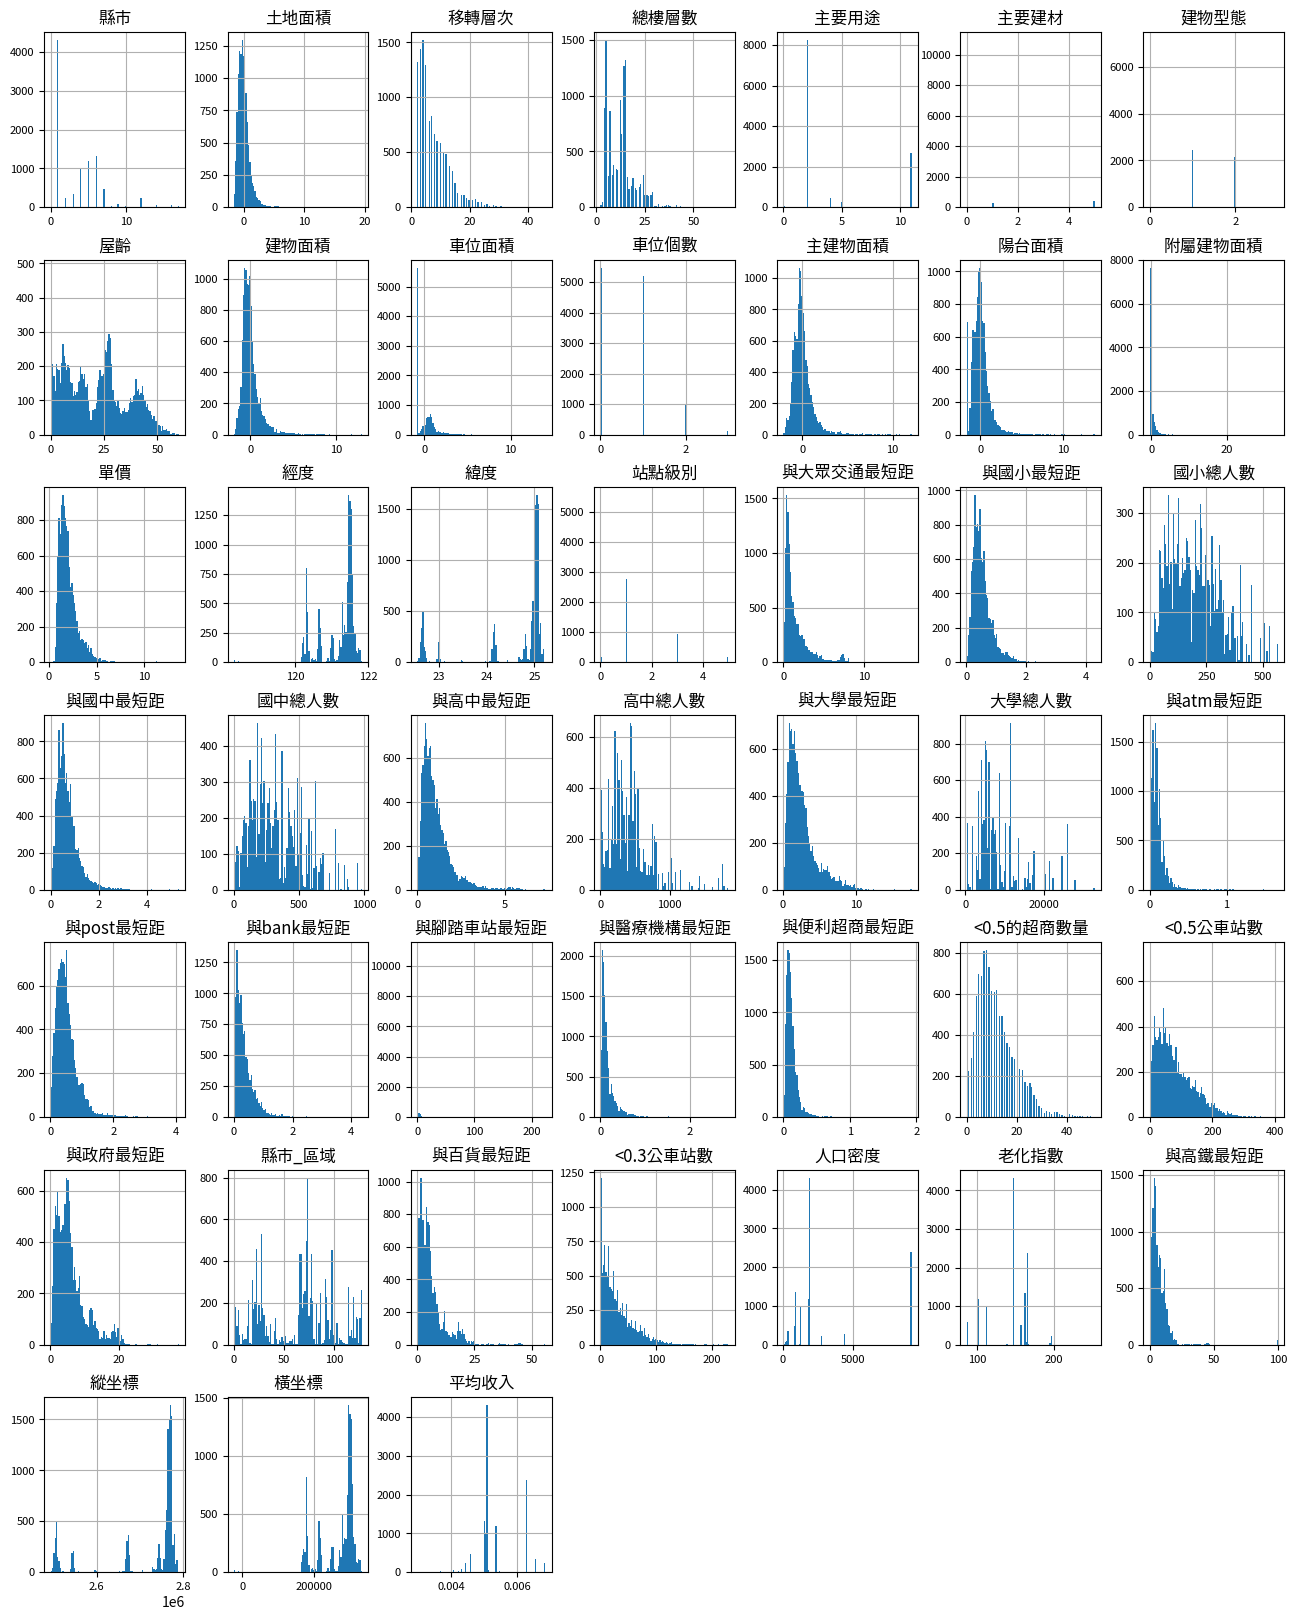

In [ ]:
df.hist(figsize=(16, 20), bins=100, xlabelsize=8, ylabelsize=8);

In [ ]:
import seaborn as sns

for i in df.columns:
    plt.figure()
    #plt.scatter(df_num1[i],df_num['單價'])
    sns.jointplot(x=df[i],y=df['單價'], data=df, kind="reg")
    plt.ylabel('單價')
    plt.xlabel(i)
    plt.title(f'{i} vs 單價')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.